# Regresja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

Rozważmy zbiór Boston

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

In [3]:
# get the data
boston_X = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
boston_Y = boston.values[1::2, 2]

In [4]:
X=boston_X
y=boston_Y

# Zadanie
Znajdż najleprzy model za pomocą podwujną cross-validation (nested cross-validation, double cross-validation) .


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

seed=123
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
kfold1 = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)

In [6]:
grid_1 = GridSearchCV(estimator=make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, tol=0.1)),
                      param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                      'elasticnet__alpha': [1., 2., 3.]},
                      scoring='r2',
                      cv=kfold, 
                      n_jobs=-1)
scores_1 = cross_val_score(grid_1, X, y, scoring='r2', cv=5)
print('CV ElasticNet R2: %.3f +/- %.3f' % (np.mean(scores_1), np.std(scores_1)))

CV ElasticNet R2: -0.297 +/- 1.530


In [7]:
grid_2 = GridSearchCV(
    estimator=make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1, tol=0.1)),
    param_grid={
        "polynomialfeatures__degree": [1, 2, 3, 4],
        "ridge__alpha": [1.0, 2.0, 3.0],
    },
    scoring="r2",
    cv=kfold,
    n_jobs=-1,
)
scores_2 = cross_val_score(grid_2, X, y, scoring="r2", cv=5)
print("CV Ridge R2: %.3f +/- %.3f" % (np.mean(scores_2), np.std(scores_2)))

/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/sit3kk/an

CV Ridge R2: 0.204 +/- 0.208


/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:248: LinAlgWarning: Ill-conditioned matrix (rcond=4.15851e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, assu

In [8]:
grid_3 = GridSearchCV(
    estimator=make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1, tol=0.1)),
    param_grid={
        "polynomialfeatures__degree": [1, 2, 3, 4],
        "lasso__alpha": [1.0, 2.0, 3.0],
    },
    scoring="r2",
    cv=kfold,
    n_jobs=-1,
)
scores_3 = cross_val_score(grid_3, X, y, scoring="r2", cv=5)
print("CV Lasso R2: %.3f +/- %.3f" % (np.mean(scores_3), np.std(scores_3)))

/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.070e+03, tolerance: 2.067e+03
  model = cd_fast.enet_coordinate_descent(
/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.153e+03, tolerance: 2.067e+03
  model = cd_fast.enet_coordinate_descent(


CV Lasso R2: 0.340 +/- 0.452


In [9]:
grid_4 = GridSearchCV(
    estimator=make_pipeline(
        PolynomialFeatures(degree=2), linear_model.LinearRegression()
    ),
    param_grid={"polynomialfeatures__degree": [1, 2, 3, 4]},
    scoring="r2",
    cv=kfold,
    n_jobs=-1,
)
scores_4 = cross_val_score(grid_2, X, y, scoring="r2", cv=5)
print("CV LR R2: %.3f +/- %.3f" % (np.mean(scores_4), np.std(scores_4)))

/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/sit3kk/an

CV LR R2: 0.204 +/- 0.208


/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:248: LinAlgWarning: Ill-conditioned matrix (rcond=4.15851e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/sit3kk/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solu

# Zad
Zwizualizuj wyniki.

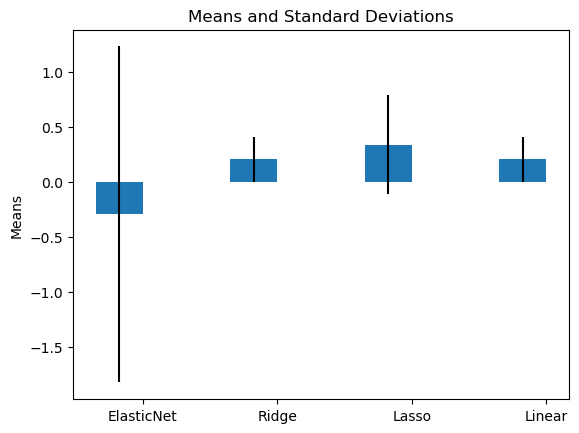

In [10]:
scores = [scores_1, scores_2, scores_3, scores_4]
means = [np.mean(score) for score in scores]
stds = [np.std(score) for score in scores]

# Create a bar plot
x = np.arange(len(scores))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width / 2, means, width, label="Means", yerr=stds)

ax.set_ylabel("Means")
ax.set_title("Means and Standard Deviations")
ax.set_xticks(x)
ax.set_xticklabels(["ElasticNet", "Ridge", "Lasso", "Linear"])

plt.show()